In [1]:
import os
from Bio import SeqIO
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from pandas import DataFrame
from sklearn.cluster import KMeans
import math

In [2]:
notebook_path = os.path.abspath("genomeClustering.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "data/J29B_expected.fasta")
pathFASTQ= os.path.join(os.path.dirname(notebook_path), "data/fastq/J29_B_CE_IonXpress_005.fastq")

expected = list(SeqIO.parse(path, "fasta"))
    
from Bio import Align
aligner = Align.PairwiseAligner()
aligner.mode = 'global'

aligner.match_score = 4
aligner.mismatch_score = -1
aligner.open_gap_score = -2
aligner.extend_gap_score = -2
aligner.target_end_gap_score = -2
aligner.query_end_gap_score = -2

#print(aligner.query_end_gap_score)


expAlign1 = aligner.align(expected[0].seq,expected[1].seq)
print("JELEN 5-6 = ",249-expAlign1[0].score, "Number of alignments: %d" % len(expAlign1))
expAlign2 = aligner.align(expected[1].seq,expected[2].seq)
print("JELEN 6-7 = ",249-expAlign2[0].score, "Number of alignments: %d" % len(expAlign2))
expAlign3 = aligner.align(expected[0].seq,expected[2].seq)
print("JELEN 5-7 = ",249-expAlign3[0].score, "Number of alignments: %d" % len(expAlign3))

data = list(SeqIO.parse(pathFASTQ, "fastq"))



JELEN 5-6 =  -675.0 Number of alignments: 16
JELEN 6-7 =  -625.0 Number of alignments: 16
JELEN 5-7 =  -609.0 Number of alignments: 96


In [3]:
sizedReadings = []

for dataDistances in data:
    if(len(dataDistances.seq)==296):
        sizedReadings.append(dataDistances.seq[27:-20])
df = DataFrame(np.zeros((len(sizedReadings)+3, len(sizedReadings))))

for i in range(0, len(sizedReadings)):
    for j in range(i, len(sizedReadings)):
        distance = aligner.align(sizedReadings[i], sizedReadings[j]).score
        df[i][j] = distance
        df[j][i] = distance
print(df)

       0      1      2      3      4      5      6      7      8      9    \
0    996.0  978.0  983.0  911.0  906.0  983.0  978.0  895.0  911.0  911.0   
1    978.0  996.0  983.0  919.0  914.0  991.0  975.0  903.0  919.0  919.0   
2    983.0  983.0  996.0  916.0  911.0  988.0  980.0  900.0  916.0  916.0   
3    911.0  919.0  916.0  996.0  991.0  924.0  908.0  980.0  996.0  996.0   
4    906.0  914.0  911.0  991.0  996.0  919.0  903.0  980.0  991.0  991.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
836  911.0  919.0  916.0  996.0  991.0  924.0  908.0  980.0  996.0  996.0   
837  911.0  911.0  924.0  988.0  983.0  916.0  908.0  972.0  988.0  988.0   
838    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
839    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
840    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

     ...    828    829    830    831    832    833    834    835    836    

In [4]:
for i in range(0, len(sizedReadings)):
    df[i][len(sizedReadings)] = aligner.align(expected[0].seq, sizedReadings[i]).score
    df[i][len(sizedReadings)+1] = aligner.align(expected[1].seq, sizedReadings[i]).score
    df[i][len(sizedReadings)+2] = aligner.align(expected[2].seq, sizedReadings[i]).score

print(df)
    
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])


       0      1      2      3      4      5      6      7      8      9    \
0    996.0  978.0  983.0  911.0  906.0  983.0  978.0  895.0  911.0  911.0   
1    978.0  996.0  983.0  919.0  914.0  991.0  975.0  903.0  919.0  919.0   
2    983.0  983.0  996.0  916.0  911.0  988.0  980.0  900.0  916.0  916.0   
3    911.0  919.0  916.0  996.0  991.0  924.0  908.0  980.0  996.0  996.0   
4    906.0  914.0  911.0  991.0  996.0  919.0  903.0  980.0  991.0  991.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
836  911.0  919.0  916.0  996.0  991.0  924.0  908.0  980.0  996.0  996.0   
837  911.0  911.0  924.0  988.0  983.0  916.0  908.0  972.0  988.0  988.0   
838  911.0  919.0  916.0  996.0  991.0  924.0  908.0  980.0  996.0  996.0   
839  983.0  991.0  988.0  924.0  919.0  996.0  980.0  908.0  924.0  924.0   
840  861.0  869.0  866.0  858.0  853.0  874.0  858.0  842.0  858.0  858.0   

     ...    828    829    830    831    832    833    834    835    836    

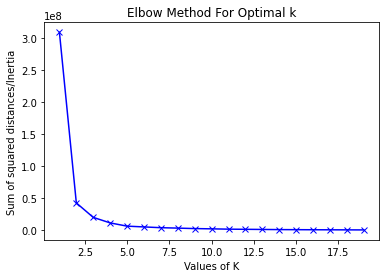

In [5]:
K = range(1,20)
Sum_of_squared_distance = []
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(principalDf)
 Sum_of_squared_distance.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distance,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

             PC1         PC2
838  -206.382223   -6.065417
839  1818.294216 -333.985336
840  3643.289666  493.499378
-206.38222293677413 -6.06541736432522
1818.2942163448804 -333.9853363563601
3643.289666014066 493.49937830215947


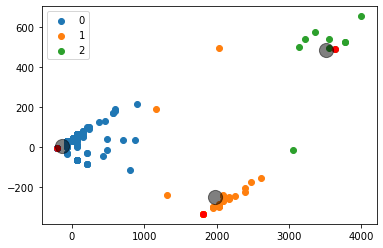

In [6]:
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(principalDf)
#print(label)

#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(principalComponents[label == i , 0] , principalComponents[label == i , 1] , label = i)


df2 = pd.DataFrame(data=principalDf.tail(3))
print(df2)
for i in range(0,len(df2)):
    print(df2.iloc[i]['PC1'], df2.iloc[i]['PC2'])
    plt.scatter(df2.iloc[i]['PC1'], df2.iloc[i]['PC2'], color='red')

    
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.legend()
plt.show()

In [7]:
dataframe_min = principalDf.min()
dataframe_max = principalDf.max()

data_dis_X = math.dist([dataframe_min['PC1']], [dataframe_max['PC1']])
data_dis_Y = math.dist([dataframe_min['PC2']], [dataframe_max['PC2']])

dis_sum = 0
for i in range(0, 3):
    for j in range(0, 3):
        if(label[len(principalDf)-1-j] == i):
            dis_X = math.dist([principalDf.iloc[len(principalDf)-1-j]['PC1']], [kmeans.cluster_centers_[i][0]])
            dis_Y = math.dist([principalDf.iloc[len(principalDf)-1-j]['PC2']], [kmeans.cluster_centers_[i][1]])
            dis_sum += (dis_X/data_dis_X + dis_Y/data_dis_Y)/6

print('Točnost modela je: ', 1-dis_sum)

Točnost modela je:  0.968107012526544


## Izračunavanje za J30 

In [8]:
notebook_path = os.path.abspath("genomeClustering.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "data/J30B_expected.fasta")
pathFASTQ= os.path.join(os.path.dirname(notebook_path), "data/fastq/J30_B_CE_IonXpress_006.fastq")

expected = list(SeqIO.parse(path, "fasta"))

expAlign1 = aligner.align(expected[0].seq,expected[1].seq)
print("JELEN 5-6 = ",249-expAlign1[0].score, "Number of alignments: %d" % len(expAlign1))
expAlign2 = aligner.align(expected[1].seq,expected[2].seq)
print("JELEN 6-7 = ",249-expAlign2[0].score, "Number of alignments: %d" % len(expAlign2))
expAlign3 = aligner.align(expected[0].seq,expected[2].seq)
print("JELEN 5-7 = ",249-expAlign3[0].score, "Number of alignments: %d" % len(expAlign3))

data = list(SeqIO.parse(pathFASTQ, "fastq"))


JELEN 5-6 =  -609.0 Number of alignments: 80
JELEN 6-7 =  -584.0 Number of alignments: 40
JELEN 5-7 =  -638.0 Number of alignments: 8


In [9]:
sizedReadings = []

for dataDistances in data:
    if(len(dataDistances.seq)==296):
        sizedReadings.append(dataDistances.seq[27:-20])
df = DataFrame(np.zeros((len(sizedReadings)+3, len(sizedReadings))))

for i in range(0, len(sizedReadings)):
    for j in range(i, len(sizedReadings)):
        distance = aligner.align(sizedReadings[i], sizedReadings[j]).score
        df[i][j] = distance
        df[j][i] = distance
print(df)

       0      1      2      3      4      5      6      7      8      9     \
0     996.0  921.0  850.0  988.0  978.0  839.0  850.0  983.0  988.0  988.0   
1     921.0  996.0  902.0  929.0  911.0  891.0  902.0  929.0  929.0  929.0   
2     850.0  902.0  996.0  858.0  845.0  983.0  996.0  858.0  858.0  858.0   
3     988.0  929.0  858.0  996.0  978.0  847.0  858.0  991.0  996.0  996.0   
4     978.0  911.0  845.0  978.0  996.0  834.0  845.0  973.0  978.0  978.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1142  850.0  902.0  996.0  858.0  845.0  983.0  996.0  858.0  858.0  858.0   
1143  847.0  899.0  991.0  855.0  842.0  988.0  991.0  855.0  855.0  855.0   
1144    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1145    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1146    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      ...   1134   1135   1136   1137   1138   1139   1140   11

In [10]:
for i in range(0, len(sizedReadings)):
    df[i][len(sizedReadings)] = aligner.align(expected[0].seq, sizedReadings[i]).score
    df[i][len(sizedReadings)+1] = aligner.align(expected[1].seq, sizedReadings[i]).score
    df[i][len(sizedReadings)+2] = aligner.align(expected[2].seq, sizedReadings[i]).score

print(df)
    
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])


       0      1      2      3      4      5      6      7      8      9     \
0     996.0  921.0  850.0  988.0  978.0  839.0  850.0  983.0  988.0  988.0   
1     921.0  996.0  902.0  929.0  911.0  891.0  902.0  929.0  929.0  929.0   
2     850.0  902.0  996.0  858.0  845.0  983.0  996.0  858.0  858.0  858.0   
3     988.0  929.0  858.0  996.0  978.0  847.0  858.0  991.0  996.0  996.0   
4     978.0  911.0  845.0  978.0  996.0  834.0  845.0  973.0  978.0  978.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1142  850.0  902.0  996.0  858.0  845.0  983.0  996.0  858.0  858.0  858.0   
1143  847.0  899.0  991.0  855.0  842.0  988.0  991.0  855.0  855.0  855.0   
1144  988.0  929.0  858.0  996.0  978.0  847.0  858.0  991.0  996.0  996.0   
1145  850.0  902.0  996.0  858.0  845.0  983.0  996.0  858.0  858.0  858.0   
1146  879.0  844.0  833.0  887.0  869.0  825.0  833.0  892.0  887.0  887.0   

      ...   1134   1135   1136   1137   1138   1139   1140   11

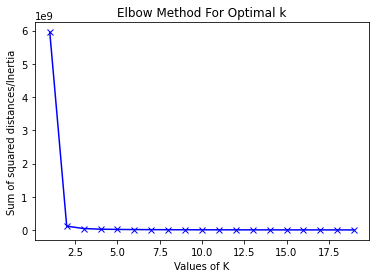

In [11]:
K = range(1,20)
Sum_of_squared_distance = []
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(principalDf)
 Sum_of_squared_distance.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distance,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

              PC1          PC2
1144 -2025.404252   -77.266388
1145  2572.929140   -95.916938
1146  -292.454340  2126.476560


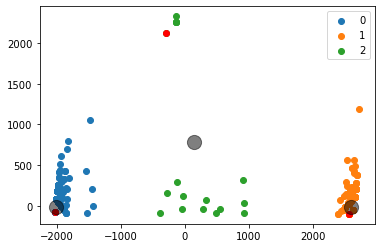

In [12]:
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(principalDf)
#print(label)

#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(principalComponents[label == i , 0] , principalComponents[label == i , 1] , label = i)


df2 = pd.DataFrame(data=principalDf.tail(3))
print(df2)
for i in range(0,len(df2)):
    plt.scatter(df2.iloc[i]['PC1'], df2.iloc[i]['PC2'], color='red')

    
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.legend()
plt.show()

In [13]:
dataframe_min = principalDf.min()
dataframe_max = principalDf.max()

data_dis_X = math.dist([dataframe_min['PC1']], [dataframe_max['PC1']])
data_dis_Y = math.dist([dataframe_min['PC2']], [dataframe_max['PC2']])

dis_sum = 0
for i in range(0, 3):
    for j in range(0, 3):
        if(label[len(principalDf)-1-j] == i):
            dis_X = math.dist([principalDf.iloc[len(principalDf)-1-j]['PC1']], [kmeans.cluster_centers_[i][0]])
            dis_Y = math.dist([principalDf.iloc[len(principalDf)-1-j]['PC2']], [kmeans.cluster_centers_[i][1]])
            dis_sum += (dis_X/data_dis_X + dis_Y/data_dis_Y)/6

print('Točnost modela je: ', 1-dis_sum)

Točnost modela je:  0.8801635273907157
